<a href="https://colab.research.google.com/github/vkjadon/tf/blob/main/tf203-dogsvscats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [59]:
import numpy as np
import tensorflow as tf
import os

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
!pwd

/content


In [4]:
!ls

drive  sample_data


In [42]:
data_dir = 'drive/MyDrive/datasets/dog-vs-cat/train/'

In [6]:
!pwd

/content


In [7]:
os.listdir(data_dir)

['dog', 'cat']

In [135]:
#os.listdir(os.path.join(data_dir,'cat'))

In [8]:
for image_class in os.listdir(data_dir):
  print("Class - ", image_class)
  i=0
  for image in os.listdir(os.path.join(data_dir, image_class)):
    i=i+1
  print(i)


Class -  dog
500
Class -  cat
501


##Assign class path (we can aslo use `cd`)
The below method will store the path in `image_path`. Can aslo directly do by storing the string in the variable as we did for `data_dir`.

In [51]:
image_path=os.path.join(data_dir, 'cat')
print(type(image_path))
print(image_path)

<class 'str'>
drive/MyDrive/datasets/dog-vs-cat/train/cat


##Show list in the files in the above directory

In [52]:
image_list=os.listdir(image_path)
print(image_list)

['cat.10018.jpg', 'cat.10030.jpg', 'cat.10025.jpg', 'cat.1007.jpg', 'cat.1010.jpg', 'cat.10146.jpg', 'cat.10151.jpg', 'cat.10144.jpg', 'cat.10152.jpg', 'cat.10150.jpg', 'cat.1013.jpg', 'cat.10145.jpg', 'cat.1012.jpg', 'cat.10193.jpg', 'cat.10179.jpg', 'cat.10178.jpg', 'cat.10191.jpg', 'cat.10187.jpg', 'cat.10233.jpg', 'cat.10232.jpg', 'cat.10344.jpg', 'cat.10346.jpg', 'cat.10350.jpg', 'cat.10352.jpg', 'cat.10391.jpg', 'cat.1038.jpg', 'cat.10385.jpg', 'cat.10421.jpg', 'cat.10436.jpg', 'cat.10554.jpg', 'cat.10596.jpg', 'cat.10555.jpg', 'cat.10568.jpg', 'cat.10582.jpg', 'cat.10597.jpg', 'cat.10608.jpg', 'cat.10634.jpg', 'cat.10620.jpg', 'cat.10637.jpg', 'cat.10623.jpg', 'cat.10757.jpg', 'cat.10805.jpg', 'cat.10781.jpg', 'cat.10795.jpg', 'cat.10839.jpg', 'cat.10807.jpg', 'cat.10813.jpg', 'cat.10959.jpg', 'cat.10964.jpg', 'cat.10970.jpg', 'cat.11070.jpg', 'cat.11059.jpg', 'cat.11058.jpg', 'cat.11066.jpg', 'cat.11064.jpg', 'cat.11105.jpg', 'cat.11111.jpg', 'cat.11104.jpg', 'cat.11138.jpg', '

In [11]:
import random
import cv2
from matplotlib import pyplot as plt

In [53]:
random_image=random.choice(os.listdir(image_path))
print(random_image)
print(type(random_image))

cat.6966.jpg
<class 'str'>


<class 'numpy.ndarray'>


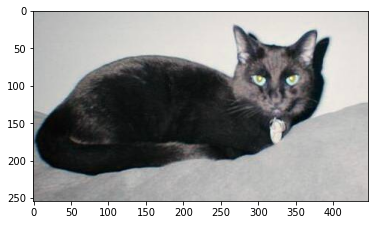

In [54]:
img = cv2.imread(os.path.join(data_dir, 'cat', random_image))
print(type(img))
plt.imshow(img.astype(int))
plt.show()

##Load Data
Generates a `tf.data.Dataset` from image files in a directory. It is loaded in the memory and is used as and when desired.   
In other word, the following command will build us the data pipeline.


In [18]:
data = tf.keras.utils.image_dataset_from_directory(data_dir)

Found 1001 files belonging to 2 classes.


In [144]:
data

<BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

To use the data output from the data generator we have to use the iterator. This allows us to access the generated data pipeline. Also, we can grab the consecutive batches using the `next` method.

In [145]:
data_iterator = data.as_numpy_iterator()

In [146]:
data_iterator

`next()` method is used to grab the data from input pipeline

In [147]:
data_batch = data_iterator.next()

In [148]:
print(type(data_batch))
print(type(data_batch[0]))
print(type(data_batch[1]))
print(len(data_batch))
print(data_batch[0].shape)
#print(data_batch[0])
#print(data_batch[1])
#print(data_batch[0][0])
#print(data_batch)

<class 'tuple'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
2
(32, 256, 256, 3)


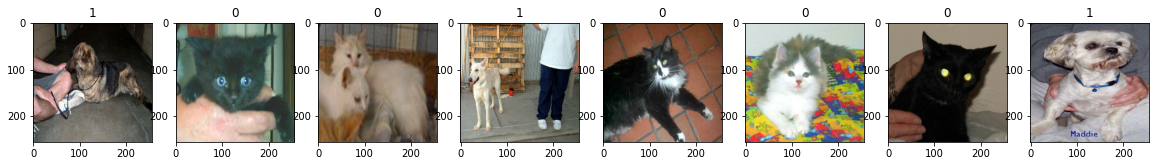

In [149]:
fig, ax = plt.subplots(ncols=8, figsize=(20,20))
for idx, img in enumerate(data_batch[0][:8]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(data_batch[1][idx])

In [150]:
data_batch[0][0].min()

0.0

##Setting Parameters as Required

In [20]:
batch_size = 32 #Number of images per batch
img_height = 224
img_width = 224

In [21]:
train_data = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 1001 files belonging to 2 classes.
Using 801 files for training.


In [153]:
len(train_data)

26

In [22]:
val_data = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 1001 files belonging to 2 classes.
Using 200 files for validation.


In [155]:
len(val_data)

7

##Create Sequential Model

In [23]:
class_names = train_data.class_names
print(class_names)
num_classes = len(class_names)

['cat', 'dog']


In [24]:
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_data.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_data.cache().prefetch(buffer_size=AUTOTUNE)

In [25]:
import tensorflow as tf
from keras import layers
from keras.models import Sequential

In [26]:
model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [27]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 224, 224, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 224, 224, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 64)        1

In [30]:
logdir = 'drive/MyDrive/datasets/dog-vs-cat/logs/'

In [31]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [32]:
epochs=5
hist = model.fit(train_ds, validation_data=val_ds, epochs=epochs, callbacks=[tensorboard_callback])

Epoch 1/5
26/26 [==============================] - 6s 66ms/step - loss: 0.8678 - accuracy: 0.4806 - val_loss: 0.7575 - val_accuracy: 0.4350
Epoch 2/5
26/26 [==============================] - 1s 36ms/step - loss: 0.6809 - accuracy: 0.5755 - val_loss: 0.6855 - val_accuracy: 0.5550
Epoch 3/5
26/26 [==============================] - 1s 34ms/step - loss: 0.6490 - accuracy: 0.6330 - val_loss: 0.6673 - val_accuracy: 0.5950
Epoch 4/5
26/26 [==============================] - 1s 34ms/step - loss: 0.5866 - accuracy: 0.6879 - val_loss: 0.6846 - val_accuracy: 0.5600
Epoch 5/5
26/26 [==============================] - 1s 34ms/step - loss: 0.4980 - accuracy: 0.7640 - val_loss: 0.6442 - val_accuracy: 0.6500


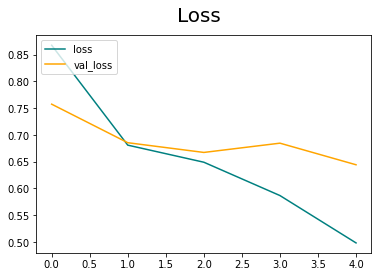

In [33]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

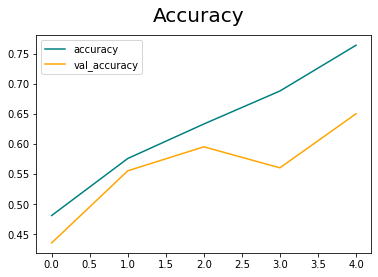

In [34]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [55]:
test_dir = 'drive/MyDrive/datasets/dog-vs-cat/test/'

In [84]:
image_path=os.path.join(test_dir, 'dog')
random_image=random.choice(os.listdir(image_path))
random_image

'dog.7243.jpg'

<class 'numpy.ndarray'>


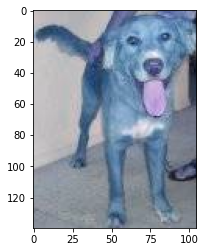

In [85]:
img = cv2.imread(os.path.join(test_dir, 'dog', random_image))
print(type(img))
plt.imshow(img.astype(int))
plt.show()

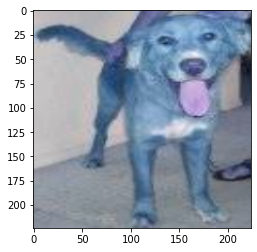

In [86]:
resize = tf.image.resize(img, (224,224))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [87]:
yhat = model.predict(tf.expand_dims(resize, 0))

1/1 [==============================] - 0s 17ms/step


In [88]:
yhat

array([[ 0.24417594, -0.06913067]], dtype=float32)

In [99]:
image_path=os.path.join(test_dir, 'cat')
random_image=random.choice(os.listdir(image_path))
img = cv2.imread(os.path.join(test_dir, 'cat', random_image))
resize = tf.image.resize(img, (224,224))
model.predict(tf.expand_dims(resize, 0))

1/1 [==============================] - 0s 17ms/step


array([[-0.3546328 ,  0.43932927]], dtype=float32)

In [173]:
test_data = tf.keras.utils.image_dataset_from_directory(
  test_dir,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 100 files belonging to 2 classes.


In [171]:
from keras.metrics import Precision, Recall, BinaryAccuracy

In [172]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()